## Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [331]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [332]:
boston = load_boston()

In [333]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [334]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)    # predictors variable

In [335]:
price = pd.DataFrame(boston.target, columns = ['PRICE'])     # target variable


In [336]:
df = pd.concat([df,price], axis = 1)

In [337]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The features can be summarized as follows:<br>
* CRIM: This is the per capita crime rate by town <br>
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft. <br>
* INDUS: This is the proportion of non-retail business acres per town.<br>
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)<br>
* NOX: This is the nitric oxides concentration (parts per 10 million)<br>
* RM: This is the average number of rooms per dwelling<br>
* AGE: This is the proportion of owner-occupied units built prior to 1940<br>
* DIS: This is the weighted distances to five Boston employment centers<br>
* RAD: This is the index of accessibility to radial highways<br>
* TAX: This is the full-value property-tax rate per $10,000 <br>

* PTRATIO: This is the pupil-teacher ratio by town <br>
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town <br>
* LSTAT: This is the percentage lower status of the population <br>



In [338]:
df.shape

(506, 14)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [340]:
df.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

So we have not any missing values in any column so we are good to go

Now we will see the relationship between the features and our target column

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

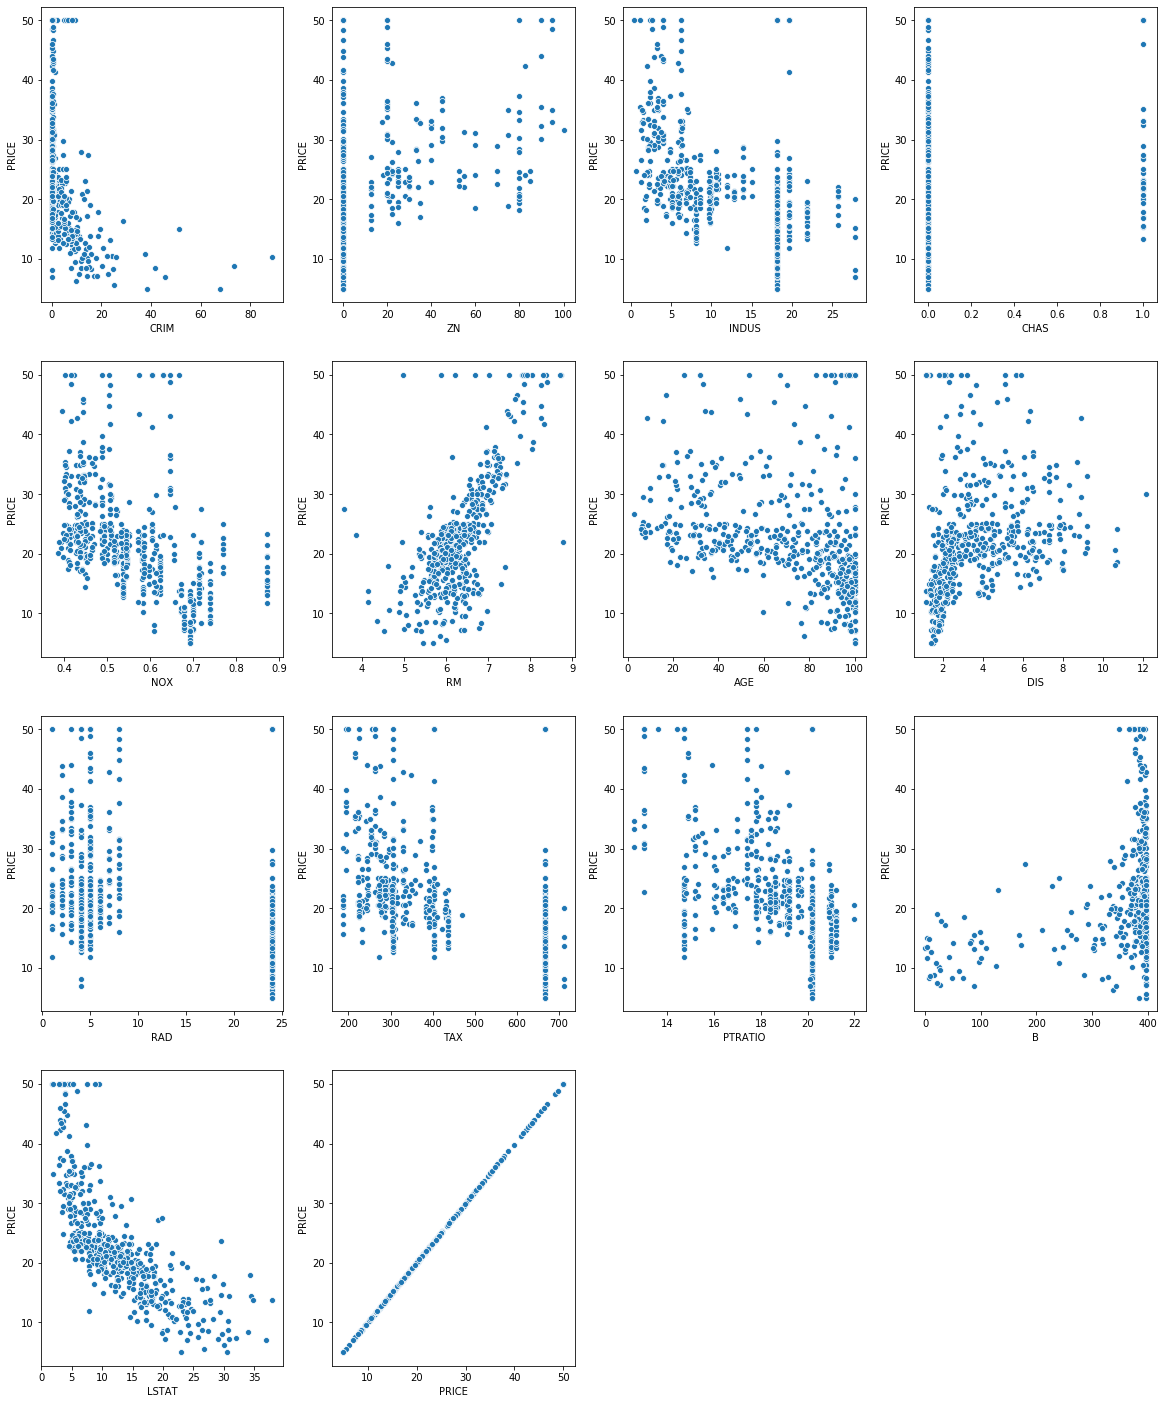

In [341]:
import seaborn as sns
plt.figure(figsize = (20,25), facecolor = 'white')
plot = 1

for column in df:
    if plot<= 14:
        ax = plt.subplot(4,4, plot)   #( nrows, ncols, index)
        sns.scatterplot(df[column],df['PRICE'])
        plot+= 1
plt.tight_layout      

Here we can see that only a few features are showing strong relationship with target column,i.e.,PRICE. So we have to remove the unnecessary features.

In [342]:
columns = ['CRIM', 'RM','AGE','DIS', 'LSTAT','PRICE']    # taking only related columns to target variable(target var included)
df = df[columns]

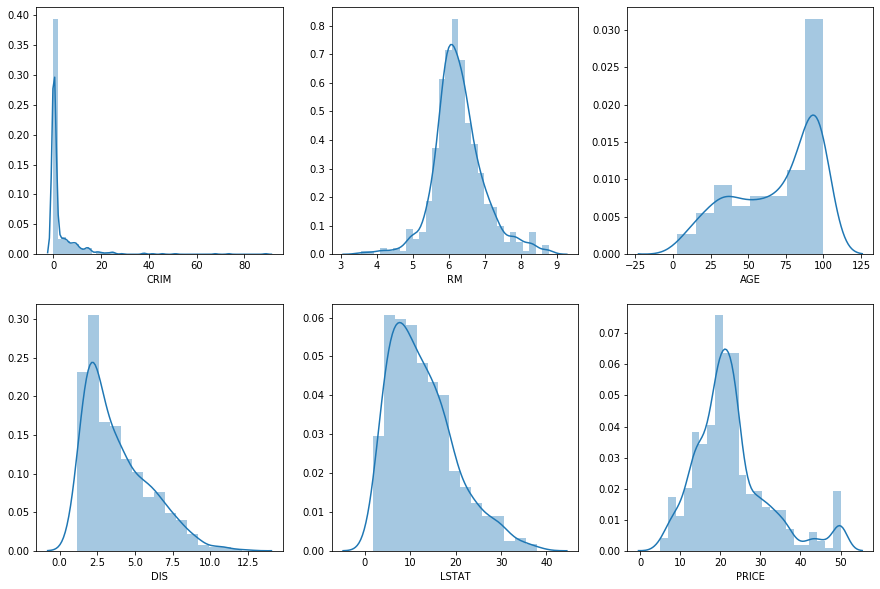

In [343]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,10), facecolor='white')
plot = 1

for column in df:
    if plot<=len(df.columns) :     
        ax = plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plot+=1
plt.show()

In [344]:
# various columns and even target column is a little bit skewed except "CRIM" column which is highly skewed, lets fix it

df.skew()

CRIM     5.223149
RM       0.403612
AGE     -0.598963
DIS      1.011781
LSTAT    0.906460
PRICE    1.108098
dtype: float64

In [345]:
crim_log = np.log(df['CRIM'])
print(crim_log.skew())

0.4059344988496048


In [346]:
df['CRIM'] = crim_log

In [347]:
df[['DIS','LSTAT']] = np.log(df[['DIS','LSTAT']])

In [348]:
df.skew()

CRIM     0.405934
RM       0.403612
AGE     -0.598963
DIS      0.152730
LSTAT   -0.320232
PRICE    1.108098
dtype: float64

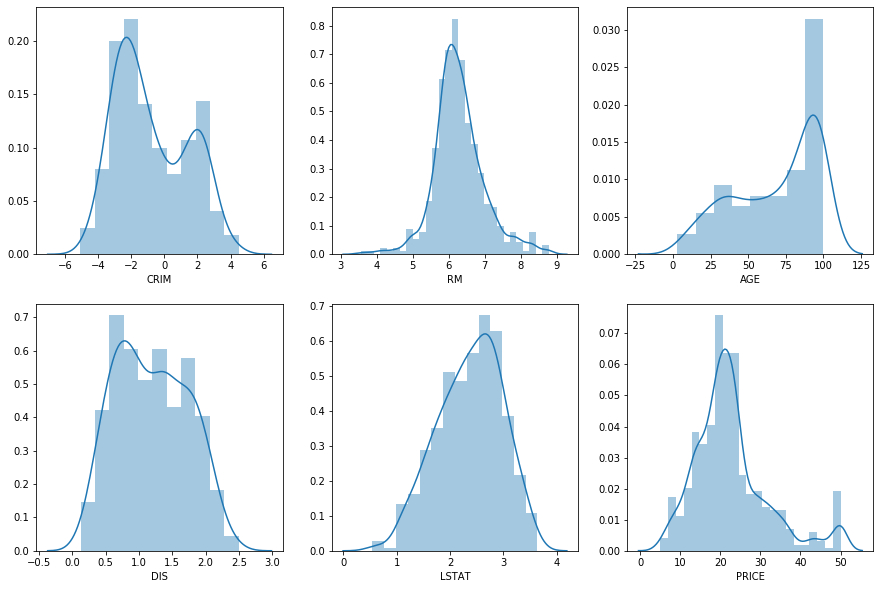

In [349]:
# let's see how data is distributed after transformation for every column
plt.figure(figsize=(15,10), facecolor='white')
plot = 1

for column in df:
    if plot<=len(df.columns) :     
        ax = plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plot+=1
plt.show()

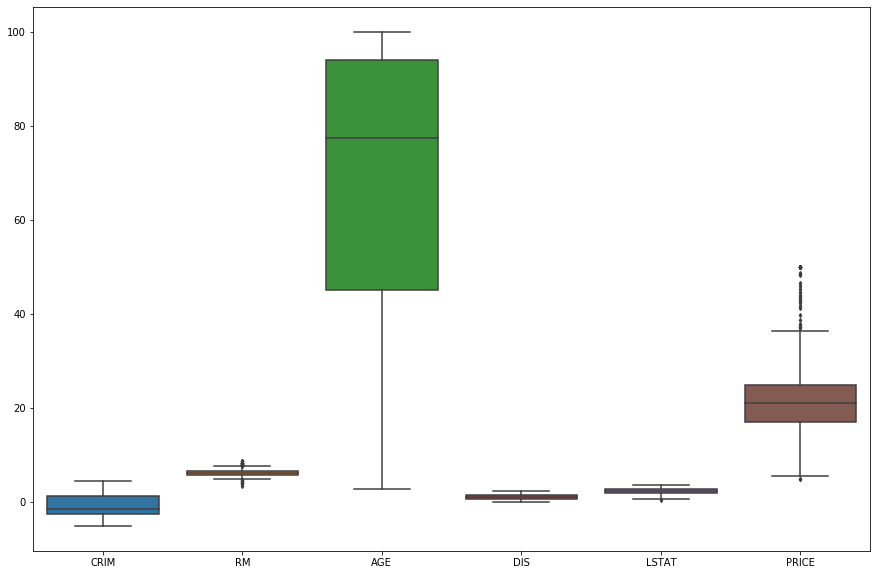

In [350]:
#Let check for the outliers in each column
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, fliersize = 3)


In [351]:
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)

In [352]:
print(Q1)
print(Q3)

17.025
25.0


In [353]:
iqr = Q3-Q1

In [354]:
upper_boundary = Q3 + 1.5*iqr
lower_boundary = Q1 - 1.5*iqr

In [355]:
print('upper_boundary:', upper_boundary)
print('lower_boundary:', lower_boundary )

upper_boundary: 36.962500000000006
lower_boundary: 5.0624999999999964


In [356]:
df['PRICE'] = df.PRICE[~(df['PRICE'] > upper_boundary)]

In [357]:
df['PRICE'] = df.PRICE[~(df['PRICE'] < lower_boundary)]

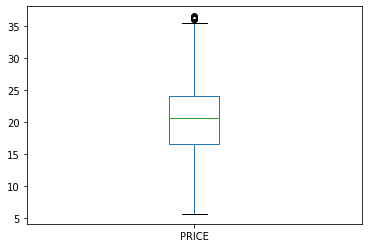

In [358]:
df['PRICE'].plot(kind = 'box')

In [361]:
df['PRICE'].isna().sum()

0

In [360]:
df['PRICE'] = df['PRICE'].fillna(df['PRICE'].mean())

After transformation we got no outliers in our independent variables and also we removed outliers from target variable.

In [306]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [388]:
X

,CRIM,RM,AGE,LSTAT
0,-5.064036,6.575,65.2,1.605430
1,-3.600502,6.421,78.9,2.212660
2,-3.601235,7.185,61.1,1.393766
3,-3.430523,6.998,45.8,1.078410
4,-2.672924,7.147,54.2,1.673351
...,...,...,...,...
501,-2.770511,6.593,69.1,2.269028
502,-3.095111,6.120,76.7,2.206074
503,-2.800824,6.976,91.0,1.729884
504,-2.211009,6.794,89.3,1.868721


Now go for feature scaling before fitting our data to linear regression model as its very crucial part to make an unbiased and robust model

In [389]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [390]:
# check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = X.columns

In [391]:
vif

,VIF,features
0,1.968731,CRIM
1,1.937241,RM
2,2.144675,AGE
3,3.088690,LSTAT


As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity, we dont have VIF greater than 5
so we are good to go. but we will check correlation matrix and heatnmap, lets see what happens


In [392]:
corr = X.corr()
print(corr)

           CRIM        RM       AGE     LSTAT
CRIM   1.000000 -0.306943  0.658284  0.591796
RM    -0.306943  1.000000 -0.240265 -0.664528
AGE    0.658284 -0.240265  1.000000  0.606806
LSTAT  0.591796 -0.664528  0.606806  1.000000


[Text(0.5, 0, 'CRIM'),
 Text(1.5, 0, 'RM'),
 Text(2.5, 0, 'AGE'),
 Text(3.5, 0, 'LSTAT')]

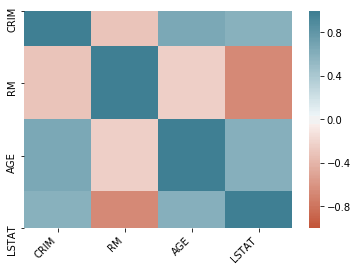

In [393]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

as we can see "AGE" and 'DIS' variable are highly correlated, so it will be better to remove one of variable, we will 
remove "DIS" variable as it seems not significant

In [394]:
X = X.drop(columns = 'DIS')

KeyError: "['DIS'] not found in axis"

In [395]:
X.head()

,CRIM,RM,AGE,LSTAT
0,-5.064036,6.575,65.2,1.605430
1,-3.600502,6.421,78.9,2.212660
2,-3.601235,7.185,61.1,1.393766
3,-3.430523,6.998,45.8,1.078410
4,-2.672924,7.147,54.2,1.673351


Now lets split our data in train and test and use linear regression and see how good it fits our data

In [396]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 345)

In [397]:
x_test

,CRIM,RM,AGE,LSTAT
27,-0.045238,6.047,88.8,2.849550
227,-0.885810,7.163,79.9,1.850028
487,1.576020,5.905,53.2,2.437990
447,2.295042,6.251,96.6,2.799717
373,2.407675,4.906,100.0,3.548755
...,...,...,...,...
201,-3.368246,6.162,38.4,2.005526
344,-3.490357,6.874,28.1,1.528228
166,0.698229,7.929,96.2,1.308333
78,-2.874223,6.232,53.7,2.512846


In [398]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [399]:
y_pred = reg.predict(x_test)
y_pred

array([17.49935839, 23.54404869, 18.44337423, 15.70421634, 11.49295029,
       16.18849421, 19.49002744, 17.9472006 , 16.42382746, 18.3506605 ,
       16.65217377, 14.83167493, 21.18529284, 25.23026805, 22.84898856,
       26.00150361, 20.95276964, 26.94384197, 17.79278956, 28.79346093,
       24.49282048, 20.33007326, 24.34451686, 25.30420405, 21.15150306,
       19.00766053, 28.735206  , 15.02998448, 11.42954008, 23.97136826,
       12.19598334, 15.20618012, 29.34742002, 18.90588081, 15.8834019 ,
       15.29086137, 25.24106523, 23.24194085, 22.47254107, 19.82400383,
       19.20958849, 13.88990788, 23.10337965, 22.18755099, 17.29998826,
       17.08448882, 18.78102034, 25.15862042, 16.06296969, 14.63625826,
       30.64592569, 16.09653631, 16.46189062, 27.10900206, 13.9507936 ,
       14.80527948, 13.99544246, 16.7163159 , 24.35380253, 17.19011646,
       26.62672026, 27.61573803, 14.7164683 , 26.54517793, 24.57183333,
       21.23543725, 28.24986842, 28.30957735, 18.7613396 , 29.31

In [400]:
print(reg.intercept_)
print(reg.coef_)

30.354666659510272
[-0.86265139  0.32034587 -0.01080057 -4.86826859]


In [401]:
reg.score(x_train,y_train)     # evaluating created regression model

0.5489665685735878

In [402]:
#create a function to create adjusted R-squared
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [403]:
adj_r2(x_train,y_train)

0.5441426816064604

our adjusted R-square value is less than R square value, hence it seems that we selected the right feature and not being penalised. NOw check how well our model fits the test data

In [404]:
reg.score(x_test, y_test)

0.5024692126316883

In [405]:
from sklearn.metrics import r2_score       # we can aslo evaluate model by using this package 
r2_score(y_test, y_pred)

0.5024692126316883

In [406]:
adj_r2(x_test, y_test)

0.48615672779994035

we can see here that r2 score is less for our test data, possible conditions are our model is overfitting training data.

In [407]:
# let's check if our model is overfitting our training data
# Lasso Regularization (LassoCV will return best alpha and coeffiecients after performing 10 cross validaions)
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
lcv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lcv.fit(x_train,y_train)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [408]:
alpha = lcv.alpha_
alpha

0.004768623942780341

In [409]:
#now we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.004768623942780341, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [410]:
lasso_reg.score(x_test,y_test)

0.5025537211452685

After regularization we got r2 score for test data same as  it was before regularization, so it's clear that regression model did'nt overfitted.

In [411]:
# saving the model to the local file system
import pickle
filename = 'regression_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [417]:
# Prediction using saved model
model = pickle.load(open(filename, 'rb'))
price = model.predict([[-0.045238, 6.047, 88.8, 2.849550]])
price

array([17.49935726])